# Linear regression vs nonlinear. Sklearn vs Scipy

## Introduction

Some time researches deals with еxperimental data. Also they develops physical models that described underlying processes. We want to know how well those models fits the experimental data. This is ensures our understandings of physical processes. As a result the are a bunch of nonlinear models needed to evaluate over еxperimental data. The question is how to find appropriate approach.

## Data preparation

Let's consider a simple example. Here we generate data for $y = ax^b$ model and then apply noize.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [12]:
count = 100
noise = 5
x_min = 5
x_max= 15
a = 0.5
b = 1.7
X = np.linspace(x_min, x_max, count)
Y_original = a * np.power(X, b)
Y_measured = Y_original + np.random.normal(0, noise, count)

## Scipy nonlinear regression

In [13]:
def model(x, a, b):
    return a * x ** b

popt, pcov = curve_fit(model, X, Y_measured)
Y_fit_scipy = model(X, *popt)
popt

array([0.45933841, 1.72479251])

## Sklearn linear regression over nonlinear features

We want to evaluate the model $y = ax^b$. But Sklearn does not support evaluation for this kind of models. It can do linear regression. It means we have to apply nonlinear transformation to model values in order to make new features connected lineary. Let's apply $log()$ function for every side of the model equation. As a result we got: $log(y) = log(a)+blog(x)$. This is linear equation for $log(x)$ and $log(y)$ values which can be evaluated over Sklearn. After all evaluated $log(y)$ can be restored to $y$ by applying $exp()$ function.

In [17]:
#encode nonlinear features
X_encoded = np.log(X)
Y_encoded = np.log(Y_measured)

#reshape for sklearn
X_train = X_encoded.reshape(-1, 1)
Y_train = Y_encoded.reshape(-1, 1)

#regression
regression = LinearRegression()
regression.fit(X_train, Y_train)

#evaluation
Y_predict = regression.predict(X_train)
Y_fit_encoded = Y_predict.reshape(1, -1)[0]

#decode result to initial state
Y_fit_sklearn = np.exp(Y_fit_encoded)

## Data analysis

Now let's plot all the data.

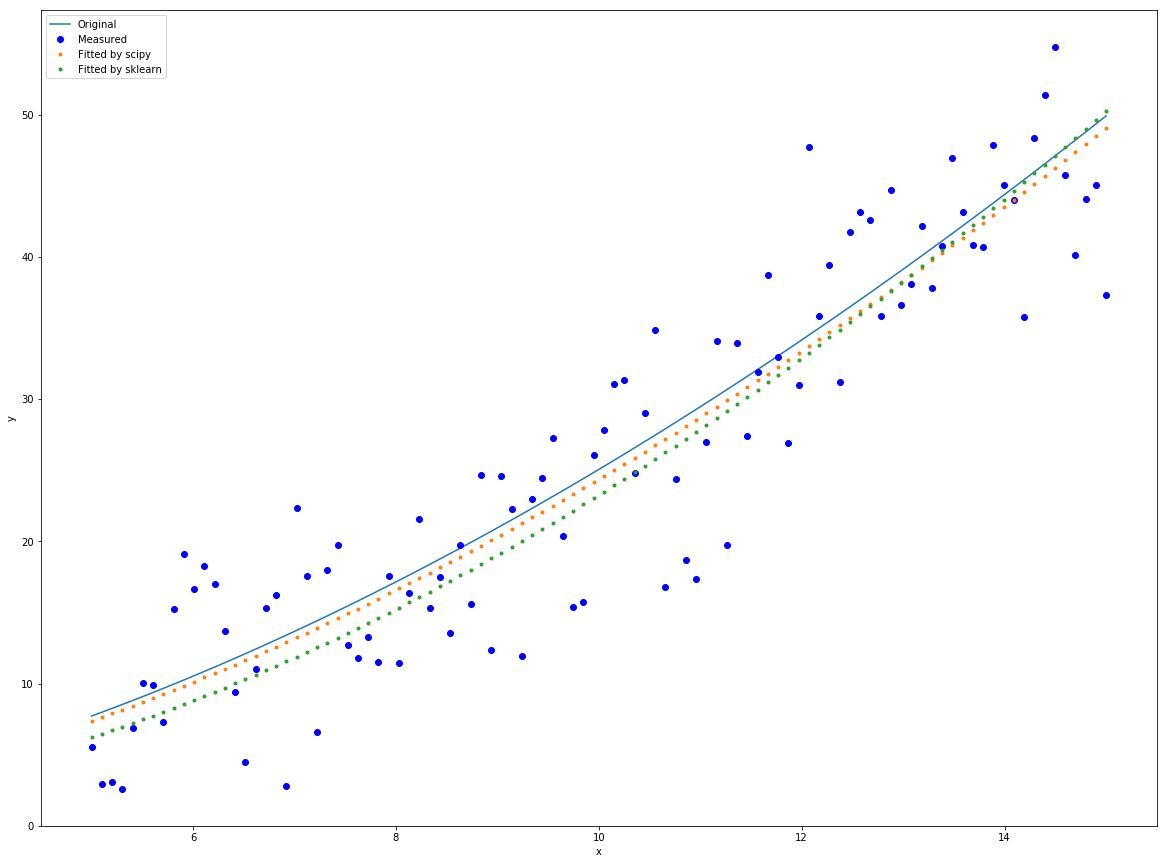

In [15]:
plt.figure(figsize=(20,15))
plt.plot(X, Y_original, '-', label='Original')
plt.plot(X, Y_measured, 'bo', label='Measured')
plt.plot(X, Y_fit_scipy, '.', label='Fitted by scipy')
plt.plot(X, Y_fit_sklearn, '.', label='Fitted by sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Here is a plot for nonlinear feature space where Sklearn evaluation is linear function.

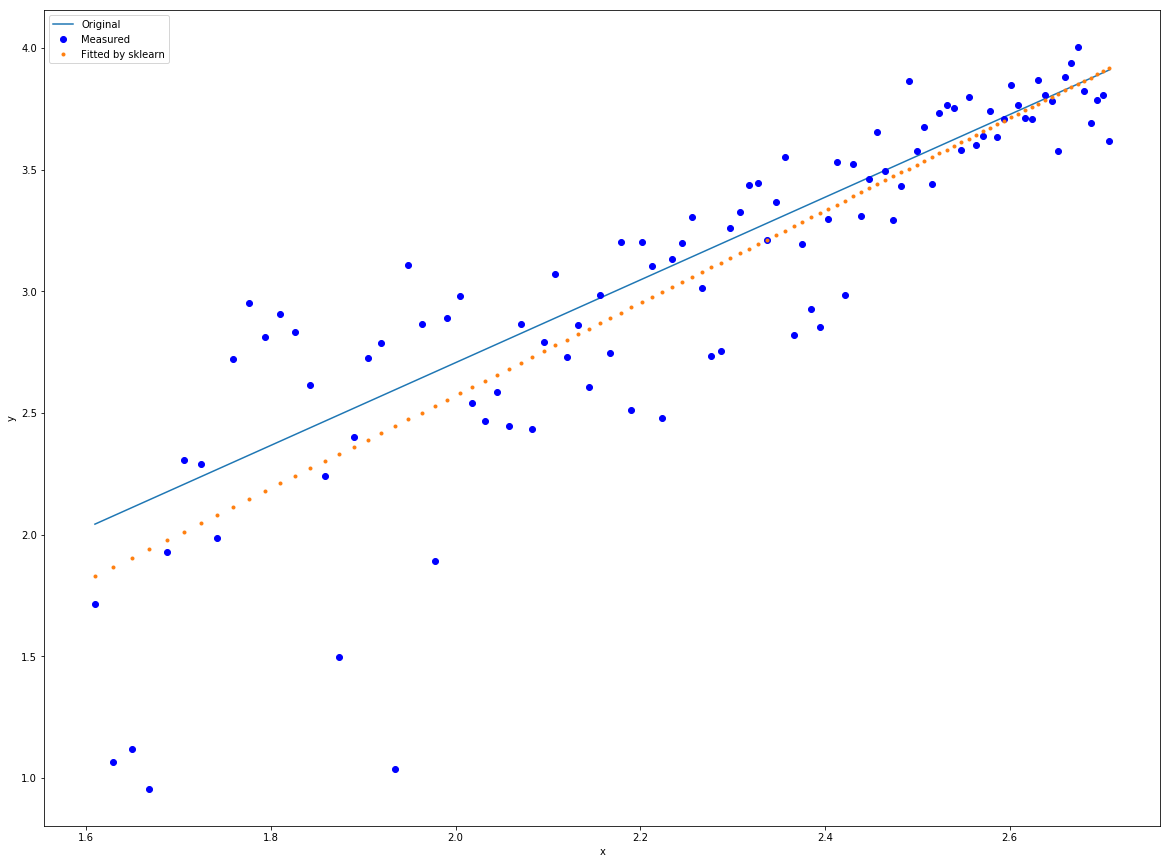

In [16]:
Y_original_encoded = np.log(Y_original)

plt.figure(figsize=(20,15))
plt.plot(X_encoded, Y_original_encoded, '-', label='Original')
plt.plot(X_encoded, Y_encoded, 'bo', label='Measured')
plt.plot(X_encoded, Y_fit_encoded, '.', label='Fitted by sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Conclusion

* Both approaches provide pretty good evaluation
* Scipy code is simple
* Sklearn needed more complicated code
* Scipy does not guarantee convergence. Manual tuning can be needed.
* Sklearn guarantees linear model convergence. But not all data can be encoded. For instance log function is not applicable for negative arguments.
* Scipy code is not scalable
* Sklearn approach is highly scalable. Can be easily adapted for Spark.